PERGUNTA 1

In [6]:
from scipy.io.arff import loadarff
from sklearn.feature_selection import f_classif
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Loading the dataset
data = loadarff('diabetes.arff')
df = pd.DataFrame(data[0])

# Decoding the byte string class labels
df['Outcome'] = df['Outcome'].str.decode('utf-8')

# Separate the features from the target
X = df.drop(columns=['Outcome'])        # Features
y = df['Outcome']                       # Target (normal/diabetes)

In [8]:
# Using ANOVA to determine the input variables with the worst 
# and best discriminative power
f_values = f_classif(X, y)[0]
best_power = X.columns[f_values.argmax()]
worst_power = X.columns[f_values.argmin()]

print(f'The input variable with the best discriminative power is {best_power}')
print(f'The input variable with the worst discriminative power is {worst_power}')

The input variable with the best discriminative power is Glucose
The input variable with the worst discriminative power is BloodPressure


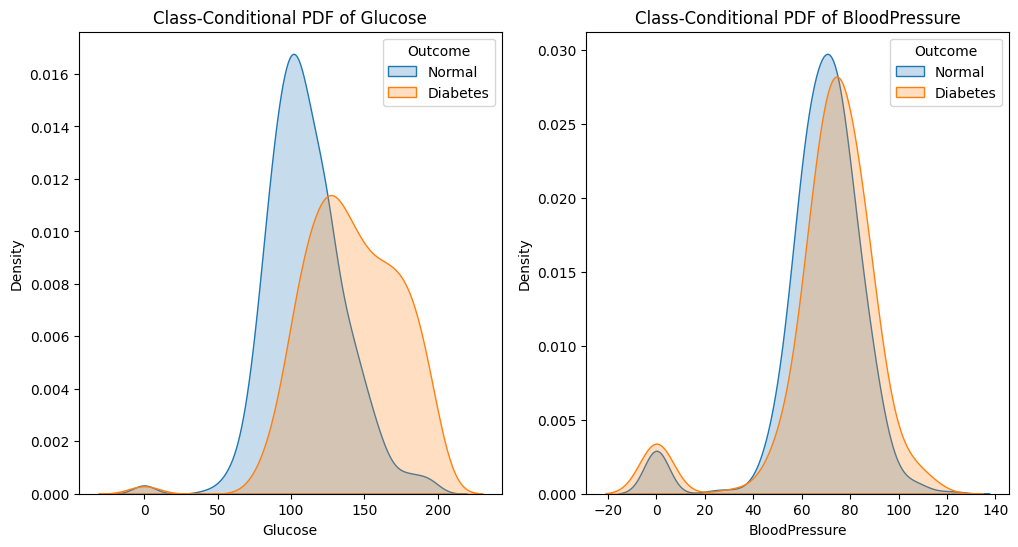

In [5]:
# Plotting the class-conditional probability density function of each feature

plt.figure(figsize=(12, 6))

# Plot for the best discriminative feature
plt.subplot(1, 2, 1)
sns.kdeplot(X[best_power][y == '0'], label='Normal', fill=True)
sns.kdeplot(X[best_power][y == '1'], label='Diabetes', fill=True)
plt.title(f'Class-Conditional PDF of {best_power}')
plt.xlabel(best_power)
plt.ylabel('Density')
plt.legend(title='Outcome')

# Plot for the worst discriminative feature
plt.subplot(1, 2, 2)
sns.kdeplot(X[worst_power][y == '0'], label='Normal', fill=True)
sns.kdeplot(X[worst_power][y == '1'], label='Diabetes', fill=True)
plt.title(f'Class-Conditional PDF of {worst_power}')
plt.xlabel(worst_power)
plt.ylabel('Density')
plt.legend(title='Outcome')

plt.show()

PERGUNTA 2

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from scipy.io.arff import loadarff
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pandas as pd

In [ ]:
# Loading the dataset
data = loadarff('diabetes.arff')
df = pd.DataFrame(data[0])

# Decoding the byte string class labels
df['Outcome'] = df['Outcome'].str.decode('utf-8')

# Separate the features from the target
X = df.drop(columns=['Outcome'])        # Features
y = df['Outcome']                       # Target (normal/diabetes)

In [11]:
# Define the parameters for the samples_split
min_samples_splits = [2, 5, 10, 20, 30, 50, 100]

# Initialize lists to store the accuracies
train_accuracies = []
test_accuracies = []

# Stratified 80-20 training-testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=1)


for min_samples in min_samples_splits:
    training_accs = []
    testing_accs = []

    # Run 10 times for averaging
    for _ in range(10):

        # Initialize a Decision Tree Classifier with the current number min_samples
        classifier = DecisionTreeClassifier(min_samples_split=min_samples)

        # Fit the model
        classifier.fit(X_train, y_train)

        # Predict on training sets
        train_pred = classifier.predict(X_train)

        # Predict on testing sets
        test_pred = classifier.predict(X_test)

        # Calculate accuracies
        training_acc = accuracy_score(y_train, train_pred)
        testing_acc = accuracy_score(y_test, test_pred)
        
        # Store accuracies
        training_accs.append(training_acc)
        testing_accs.append(testing_acc)
    
    # Average accuracies for current min_samples_split

    # Calculate mean for training accuracies
    train_mean = sum(training_accs) / len(training_accs) if training_accs else 0
    train_accuracies.append(train_mean)

    # Calculate mean for testing accuracies
    test_mean = sum(testing_accs) / len(testing_accs) if testing_accs else 0
    test_accuracies.append(test_mean)

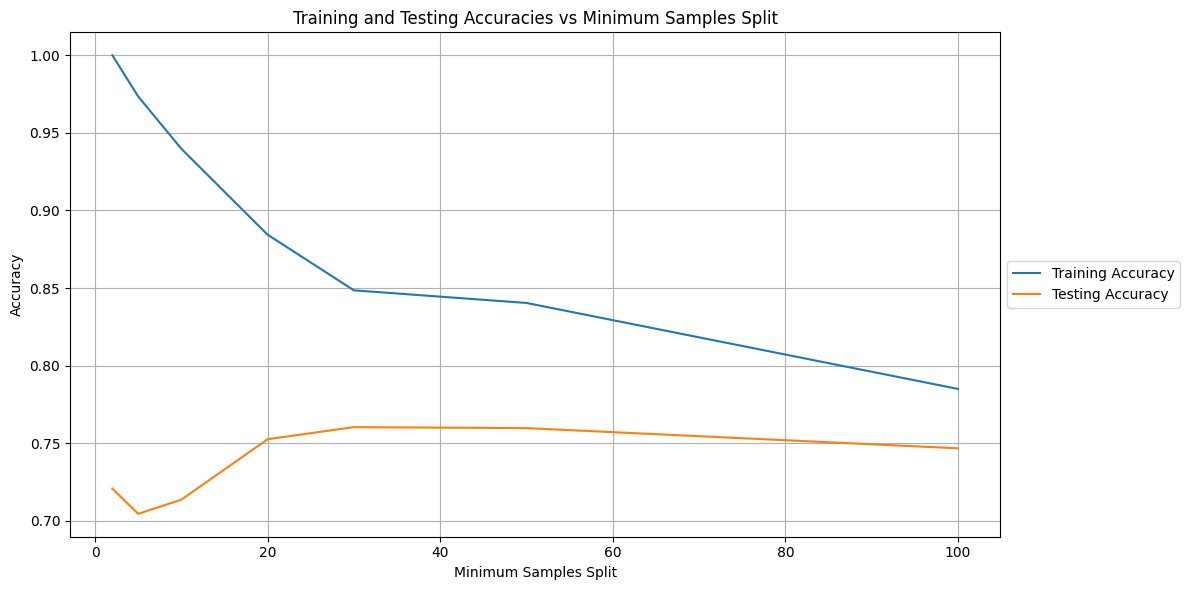

In [13]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(min_samples_splits, train_accuracies, label='Training Accuracy')
plt.plot(min_samples_splits, test_accuracies, label='Testing Accuracy')
plt.title('Training and Testing Accuracies vs Minimum Samples Split')
plt.xlabel('Minimum Samples Split')
plt.ylabel('Accuracy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

pergunta 4


In [14]:
from sklearn.tree import plot_tree, DecisionTreeClassifier
from scipy.io.arff import loadarff
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
# Loading the dataset
data = loadarff('diabetes.arff')
df = pd.DataFrame(data[0])

# Decoding the byte string class labels
df['Outcome'] = df['Outcome'].str.decode('utf-8')

# Separate the features from the target
X = df.drop(columns=['Outcome'])        # Features (8 biological features
y = df['Outcome']                       # Target (normal/diabetes)

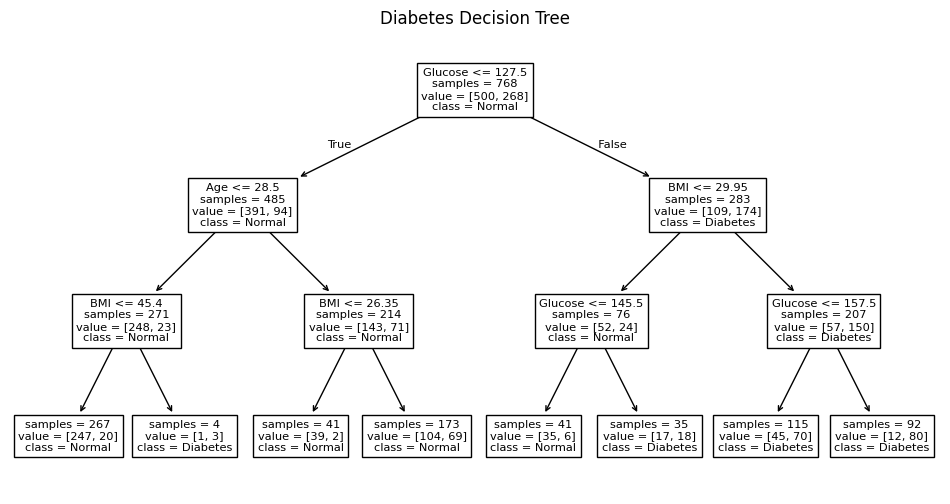

In [16]:
# Initialize a Decision Tree Classifier with the required maximum depth
classifier = DecisionTreeClassifier(max_depth=3, random_state=1)

# Fit the model
classifier.fit(X, y)

# Plot the results
plt.figure(figsize=(12, 6))
plot_tree(classifier, feature_names=X.columns, class_names=['Normal', 'Diabetes'], impurity=False)
plt.title('Diabetes Decision Tree')
plt.show()

Se o indivíduo apresentar um nível de glucose inferior ou igual a 127.5, idade menor ou igual a 28.5 anos e um índice de massa corporal (BMI) superior a 45.4, então este terá diabetes, com uma probabilidade de 3/4 = 75%.
Se o indivíduo apresentar um nível de glucose superior a 127.5, índice de massa corporal (BMI) menor ou igual a 29.95 e um nível de glucose superior a 145.5, então a probabilidade de ter diabetes é 18/35 ≈ 51,4%.
Se o indivíduo apresentar um nível de glucose superior a 127.5 e um índice de massa corporal (BMI) superior a 29.95, então este terá diabetes. Caso tenha um nível de glucose inferior ou igual a 157.5 a probabilidade de ter a doença é de 70/115 ≈ 60,9%, caso contrário, tendo um nível de glucose superior a 157.5, então a probabilidade é cerca de 80/92 ≈ 87%.

As probabilidades foram calculadas dividindo o número de casos com diabetes (segundo elemento de *value*) pelo número total de casos (*samples*) no nó respetivo.